# Starting to Explore

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 4

In [2]:
df = pd.read_json('cleaned_nobel.json')

In [3]:
df.country.unique()

array(['Austria', None, 'Australia', 'Germany', 'Guatemala', 'Greece',
       'Hong Kong', 'Hungary', 'Ghana', 'France', 'Finland', 'Denmark',
       'East Timor', 'Egypt', 'Czech Republic',
       "China, People's Republic of", 'Colombia',
       'Congo, Democratic Republic', 'Costa Rica', 'China, Republic of',
       'Chile', 'Canada', 'Belgium', 'Bangladesh', 'Belarus', 'Argentina'],
      dtype=object)

In [4]:
df[['name', 'award_age', 'category', 'year', 'date_of_birth', 'dob', 'date_of_death', 'country']]

,name,award_age,category,year,date_of_birth,dob,date_of_death,country
0,Karl Landsteiner,62,Physiology or Medicine,1930,14 June 1868,-3204576000000,26 June 1943,Austria
1,Elfriede Jelinek,58,Literature,2004,20 October 1946,-732153600000,None,Austria
2,Eric Kandel,71,Physiology or Medicine,2000,7 November 1929,-1267056000000,None,None
3,Walter Kohn,75,Chemistry,1998,9 March 1923,-1477440000000,19 April 2016,None
4,Friedrich Hayek,75,Economics,1974,8 May 1899,-2229552000000,23 March 1992,Austria
...,...,...,...,...,...,...,...,...
321,Bertha von Suttner,62,Peace,1905,9 June 1843,-3994012800000,21 June 1914,Austria
322,Adolfo Pérez Esquivel,49,Peace,1980,26 November 1931,-1202342400000,None,Argentina
323,Luis Federico Leloir,64,Chemistry,1970,6 September 1906,-1998259200000,2 December 1987,Argentina
324,Bernardo Houssay,60,Physiology or Medicine,1947,10 April 1887,-2610662400000,21 September 1971,Argentina


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 325
Data columns (total 14 columns):
link              321 non-null object
name              321 non-null object
year              321 non-null int64
category          321 non-null object
country           256 non-null object
born_in           65 non-null object
text              321 non-null object
date_of_birth     321 non-null object
date_of_death     240 non-null object
place_of_birth    321 non-null object
place_of_death    240 non-null object
gender            321 non-null object
dob               321 non-null int64
award_age         321 non-null int64
dtypes: int64(3), object(11)
memory usage: 37.6+ KB


In [6]:
df.date_of_death = pd.to_datetime(df.date_of_death)
df.date_of_birth = pd.to_datetime(df.date_of_birth)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 325
Data columns (total 14 columns):
link              321 non-null object
name              321 non-null object
year              321 non-null int64
category          321 non-null object
country           256 non-null object
born_in           65 non-null object
text              321 non-null object
date_of_birth     321 non-null datetime64[ns]
date_of_death     240 non-null datetime64[ns]
place_of_birth    321 non-null object
place_of_death    240 non-null object
gender            321 non-null object
dob               321 non-null int64
award_age         321 non-null int64
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 37.6+ KB


# Plotting with Pandas

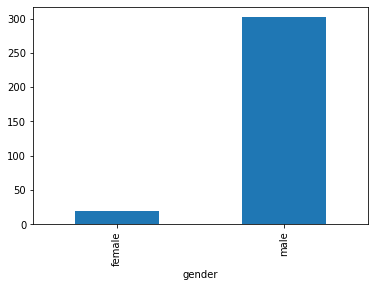

In [8]:
by_gender = df.groupby('gender')
by_gender.size().plot(kind='bar')

In [9]:
by_gender.size()

gender
female     19
male      302
dtype: int64

# Gender Disparities

In [10]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
87,Maria Goeppert-Mayer,1963
160,Marie Curie,1903
310,Donna Strickland,2018


In [11]:
by_cat_gen.size()

category                gender
Chemistry               female     2
                        male      71
Economics               male      11
Literature              female     6
                        male      43
Peace                   female     3
                        male      36
Physics                 female     3
                        male      68
Physiology or Medicine  female     5
                        male      73
dtype: int64

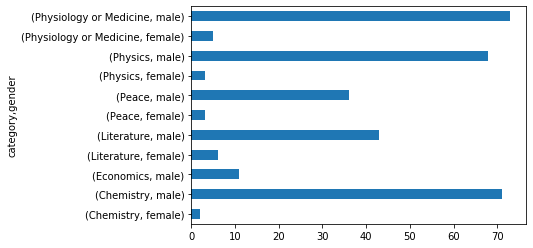

In [12]:
by_cat_gen.size().plot(kind='barh')

### Unstacking Groups

In [13]:
by_cat_gen.size().unstack()

gender,female,male
category,,
Chemistry,2.0,71.0
Economics,NaN,11.0
Literature,6.0,43.0
Peace,3.0,36.0
Physics,3.0,68.0
Physiology or Medicine,5.0,73.0


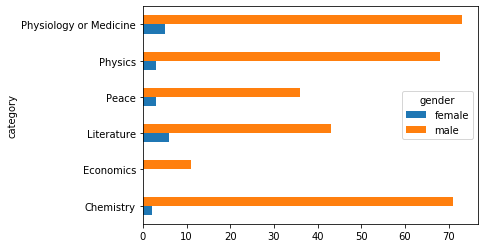

In [14]:
by_cat_gen.size().unstack().plot(kind='barh')

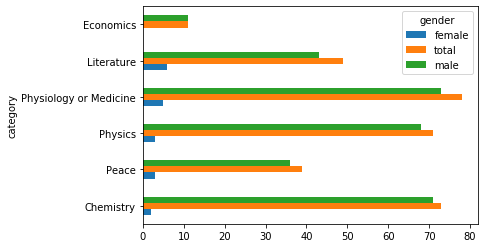

In [15]:
# 11-3
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

### Historical Trends

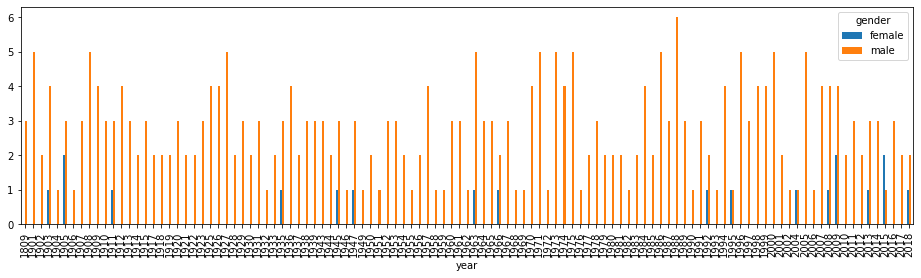

In [16]:
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16, 4))

In [17]:
# 11-4
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap],
                            rotation=rotation)
    ax.figure.show()

In [18]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1809,NaN,3.0
1901,NaN,5.0
1902,NaN,2.0
1903,1.0,4.0
1904,NaN,1.0
...,...,...
2014,NaN,3.0
2015,2.0,1.0
2016,NaN,3.0


In [19]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

Text(0.5, 0, 'Year')

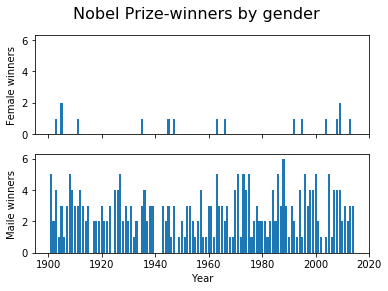

In [20]:
# 11-5

new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True)

ax_f = axes[0]
ax_m = axes[1]

fig.suptitle('Nobel Prize-winners by gender', fontsize=16)

ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Maile winners')

ax_m.set_xlabel('Year')

# National Trends

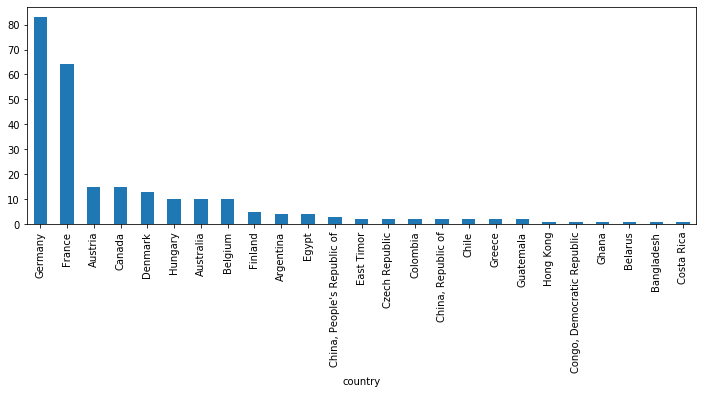

In [21]:
df.groupby('country').size().sort_values(ascending=False).plot(kind='bar', figsize=(12, 4))

## Prize Winner per Capita

In [22]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
       'Canada', 'Chile', 'China, People's Republic of', 'China, Republic of',
       'Colombia', 'Congo, Democratic Republic', 'Costa Rica',
       'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland', 'France',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary'],
      dtype='object', name='country')

In [23]:
from pymongo import MongoClient

def get_mongo_database(db_name, host='10.0.0.153',
                       port=27017, username=None, password=None):
    """ Get named database from MongoDB with/out authentication """
    if username and password:
        mongo_url = f'mongodb://{username}:{password}@{host}/{db_name}'
        conn = MongoClient(mongo_url)
    else:
        conn = MongoClient(host, port)
        
    return conn[db_name]

In [24]:
def mongo_to_dataframe(db_name, collection, query={},
                       host="10.0.0.153", port=27017,
                       username=None, password=None,
                       no_id=True):
    """ create a dataframe from mongodb collection """
    db = get_mongo_database(db_name, host, port, username, password)
    
    cursor = db[collection].find(query)
    
    df = pd.DataFrame(list(cursor))
    
    if no_id:
        del df['_id']
    
    return df

In [25]:
df_countries = mongo_to_dataframe('nobel_prize', 'country_data')
df_countries.iloc[0]

name                                                    Afghanistan
topLevelDomain                                                [.af]
alpha2Code                                                       AF
alpha3Code                                                      AFG
callingCodes                                                   [93]
capital                                                       Kabul
altSpellings                                       [AF, Afġānistān]
region                                                         Asia
subregion                                             Southern Asia
population                                                 26023100
latlng                                                 [33.0, 65.0]
demonym                                                      Afghan
area                                                         652230
gini                                                           27.8
timezones                                       

In [26]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] = df_countries.nobel_wins / df_countries.population

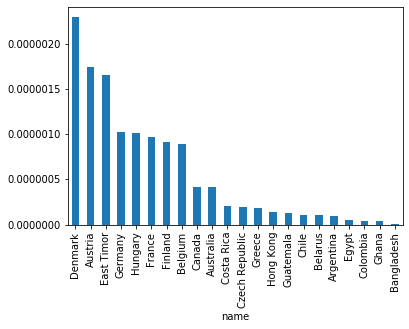

In [27]:
df_countries.sort_values(by='nobel_wins_per_capita',
                         ascending=False).nobel_wins_per_capita[df_countries.nobel_wins.notnull()].plot(kind='bar')

In [28]:
df_countries.nobel_wins.notnull()

name
Afghanistan          False
Åland Islands        False
Albania              False
Algeria              False
American Samoa       False
                     ...  
Wallis and Futuna    False
Western Sahara       False
Yemen                False
Zambia               False
Zimbabwe             False
Name: nobel_wins, Length: 250, dtype: bool

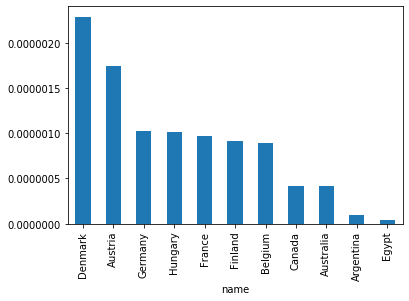

In [29]:
df_countries[df_countries.nobel_wins > 2].sort_values(
    by='nobel_wins_per_capita', ascending=False).nobel_wins_per_capita.plot(kind='bar')

### Prizes by Category

In [30]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0
Australia,NaN,NaN,1.0,NaN,2.0,7.0
Austria,3.0,1.0,1.0,2.0,3.0,5.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,NaN,NaN,NaN
Belgium,1.0,NaN,1.0,3.0,1.0,4.0
Canada,4.0,1.0,1.0,1.0,4.0,4.0
Chile,NaN,NaN,2.0,NaN,NaN,NaN
"China, People's Republic of",NaN,NaN,1.0,1.0,NaN,1.0


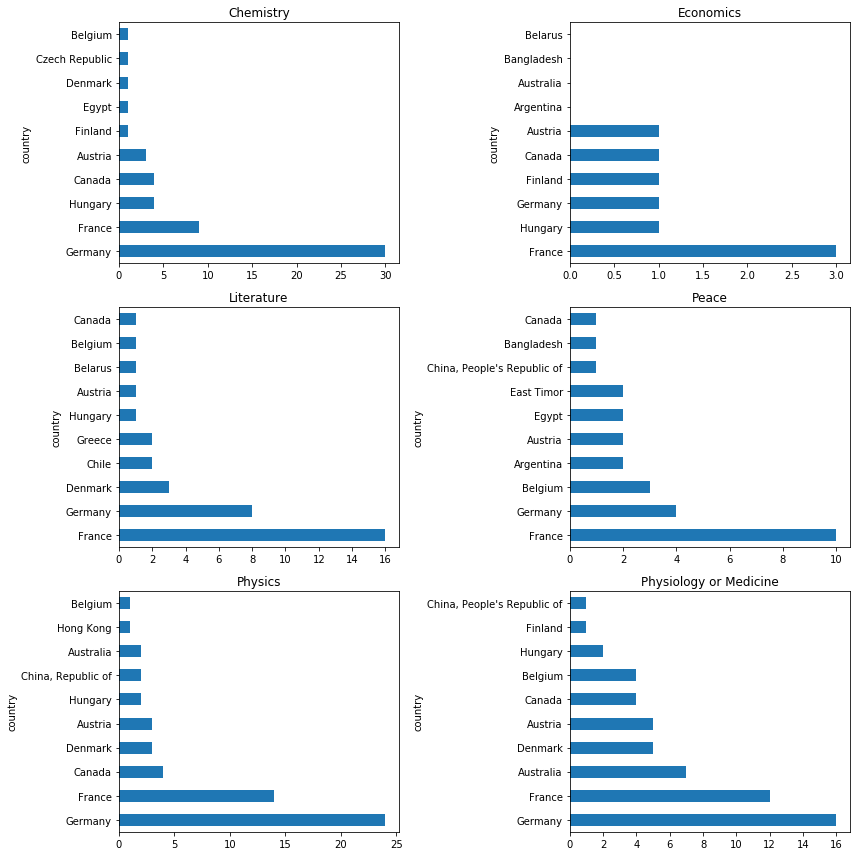

In [31]:
COL_NUM = 2
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12, 12))

for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    ax = axes[i//COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

## Historical Trends in Prize Distribution

In [32]:
plt.rcParams['font.size'] = 20

In [33]:
new_index = pd.Index(np.arange(1901, 2015), name='year')

by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index)

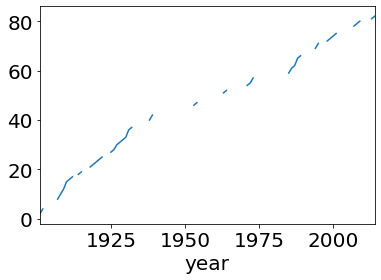

In [34]:
by_year_nat_sz['Germany'].cumsum().plot()

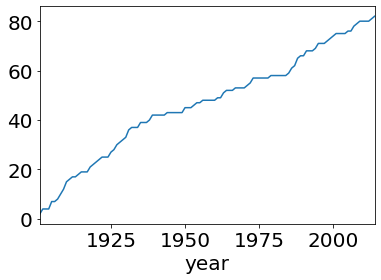

In [35]:
by_year_nat_sz['Germany'].fillna(0).cumsum().plot()

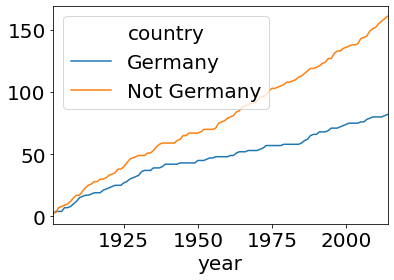

In [36]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index).fillna(0)

not_Germany = by_year_nat_sz.columns.tolist()
not_Germany.remove('Germany')

by_year_nat_sz['Not Germany'] = by_year_nat_sz[not_Germany].sum(axis=1)
ax = by_year_nat_sz[['Germany', 'Not Germany']].cumsum().plot()

In [37]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index).fillna(0)
by_year_nat_sz.columns.sort_values()

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
       'Canada', 'Chile', 'China, People's Republic of', 'China, Republic of',
       'Colombia', 'Congo, Democratic Republic', 'Costa Rica',
       'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland', 'France',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary'],
      dtype='object', name='country')

In [38]:
regions = [
    {
        'label': 'N. America',
        'countries': ['Canada']
     },
    {
        'label': 'Europe',
        'countries': ['Germany', 'France']
    },
    {
        'label': 'Asia',
        'countries': ['Bangladesh', 'China, People\'s Republic of', 'China, Republic of', 'Hong Kong']
    }
]

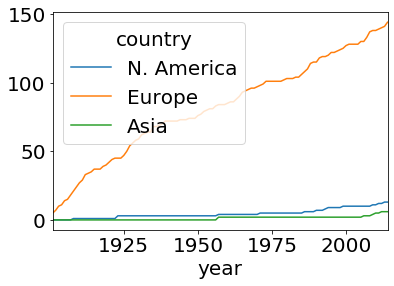

In [39]:
for region in regions:
    by_year_nat_sz[region['label']] = by_year_nat_sz[region['countries']].sum(axis=1)
    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

In [40]:
plt.rcParams.update({'font.size': 16})

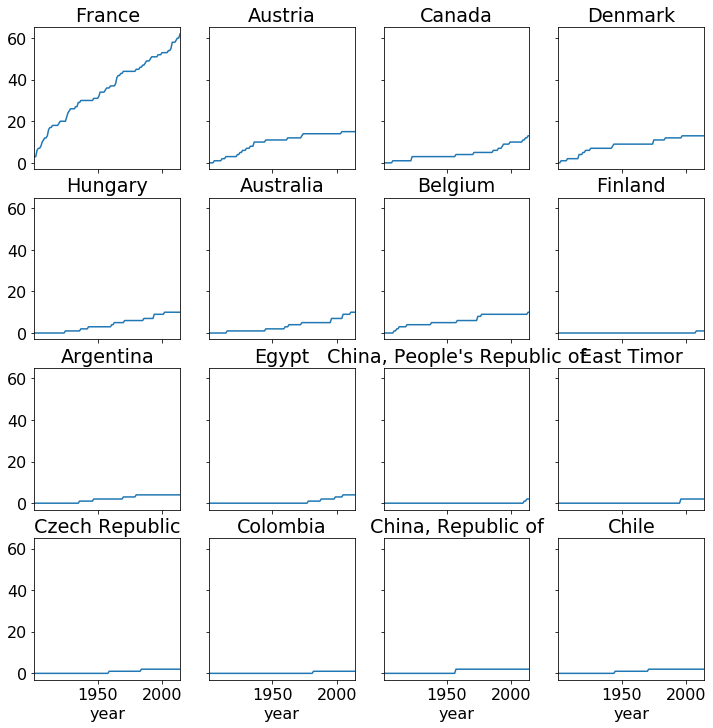

In [41]:
COL_NUM = 4
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(COL_NUM, ROW_NUM,
                         sharex=True, sharey=True,
                         figsize=(12, 12))

for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[i//COL_NUM, i%COL_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

In [42]:
sns.set()
cmap = sns.cm.rocket_r

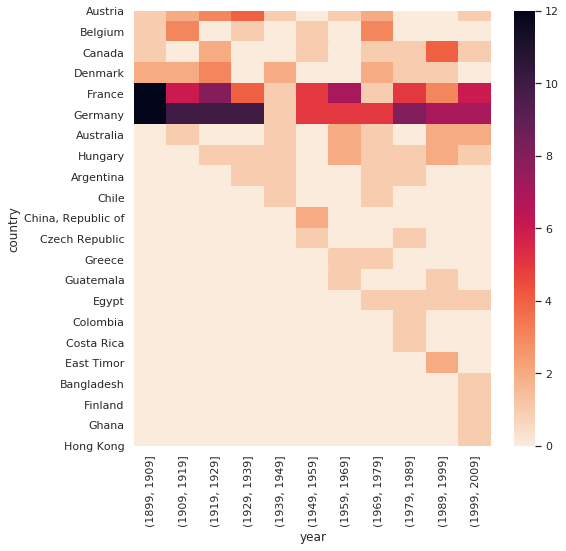

In [43]:
bins = np.arange(df.year.min(), df.year.max(), 10)

by_year_nat_binned = df.groupby(
    [pd.cut(df.year, bins, precision=0), 'country']
).size().unstack().fillna(0)

plt.figure(figsize=(8, 8))

sns.heatmap(
    by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2].transpose(), cmap=cmap)

# Age and Life Expectancy of Winners

## Age at Time of Award

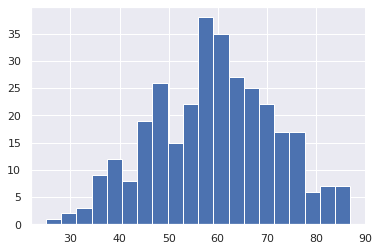

In [44]:
df['award_age'][df['award_age'] >=0 ].hist(bins=20)

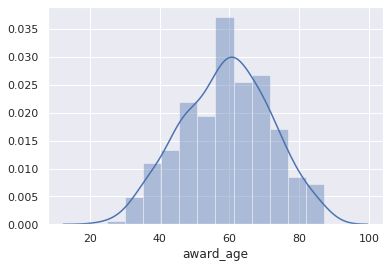

In [45]:
sns.distplot(df[df['award_age'] > 0]['award_age'])

In [46]:
df_age = df[df['award_age'] > 0]

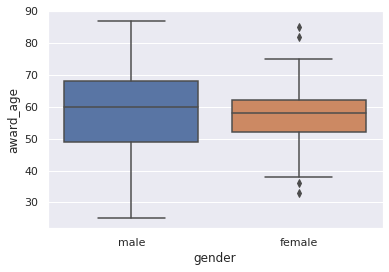

In [47]:
sns.boxplot(df_age.gender, df_age.award_age)

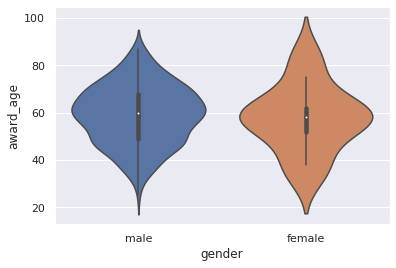

In [48]:
sns.violinplot(df_age.gender, df_age.award_age)

## Life Expectancy of Winners

In [49]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth).dt.days / 365

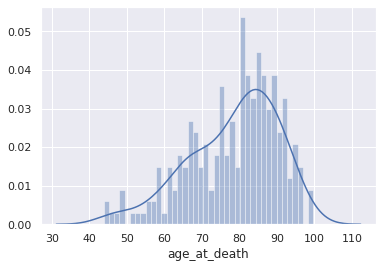

In [50]:
age_at_death = df[df['age_at_death'].notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

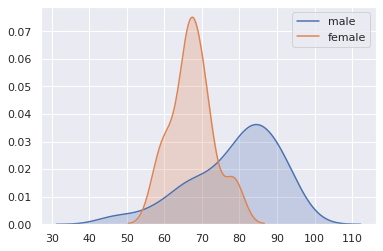

In [51]:
df2 = df[df.age_at_death.notnull()]
sns.kdeplot(df2[df2.gender == 'male'].age_at_death, shade=True, label='male')
sns.kdeplot(df2[df2.gender == 'female'].age_at_death, shade=True, label='female')

plt.legend()

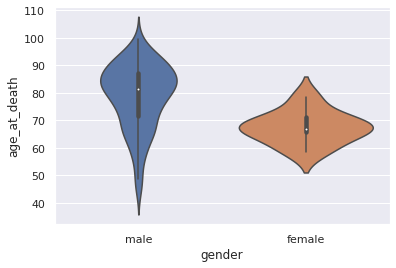

In [52]:
sns.violinplot(df.gender, age_at_death)

## Increasing Life Expectancies over Time

/home/asurin/anaconda3/envs/pyjsviz/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


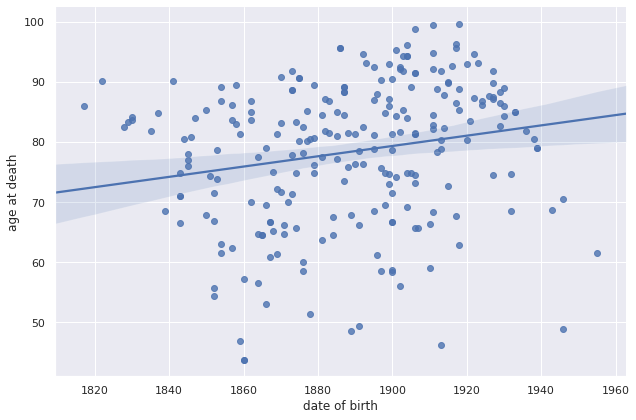

In [53]:
df_temp = df[df.age_at_death.notnull()]

data = pd.DataFrame({
    'age at death': df_temp.age_at_death,
    'date of birth': df_temp.date_of_birth.dt.year
})

sns.lmplot('date of birth', 'age at death', data, size=6, aspect = 1.5)

# The Nobel Diaspora

In [54]:
df[df.born_in.notnull()]

,link,name,year,category,country,born_in,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,dob,award_age,age_at_death
2,http://en.wikipedia.org/wiki/Eric_Kandel,Eric Kandel,2000,Physiology or Medicine,None,Austria,"Eric Kandel *, Physiology or Medicine, 2000",1929-11-07,NaT,Vienna,None,male,-1267056000000,71,NaN
3,http://en.wikipedia.org/wiki/Walter_Kohn,Walter Kohn,1998,Chemistry,None,Austria,"Walter Kohn *, Chemistry, 1998",1923-03-09,2016-04-19,Vienna,Santa Barbara,male,-1477440000000,75,93.178082
5,http://en.wikipedia.org/wiki/John_Cornforth,John Cornforth,1975,Chemistry,None,Australia,"John Cornforth *, Chemistry, 1975",1917-09-07,2013-12-08,Sydney,Brighton,male,-1651017600000,58,96.317808
9,http://en.wikipedia.org/wiki/Gerhard_Herzberg,Gerhard Herzberg,1971,Chemistry,None,Germany,"Gerhard Herzberg *, Chemistry, 1971",1904-12-25,1999-03-03,Hamburg,Ottawa,male,-2051827200000,67,94.249315
11,http://en.wikipedia.org/wiki/Bernard_Katz,Bernard Katz,1970,Physiology or Medicine,None,Germany,"Bernard Katz *, Physiology or Medicine, 1970",1911-03-26,2003-04-20,Leipzig,London,male,-1854662400000,59,92.131507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,http://en.wikipedia.org/wiki/Ivo_Andri%C4%87,Ivo Andrić,1961,Literature,None,Bosnia and Herzegovina,"Ivo Andrić *, Ethnic Croat and national born...",1892-10-09,1975-03-13,Dolac,Belgrade,male,-2437084800000,69,82.476712
307,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog,1975,Chemistry,None,Bosnia and Herzegovina,"Vladimir Prelog *, Ethnic Croat and national ...",1906-07-23,1998-01-07,Sarajevo,Zürich,male,-2002147200000,69,91.523288
308,http://en.wikipedia.org/wiki/Peter_Medawar,Peter Medawar,1960,Physiology or Medicine,None,Brazil,"Peter Medawar *, Physiology or Medicine, 1960",1915-02-28,1987-10-02,Rio de Janeiro,London,male,-1730678400000,45,72.641096
309,http://en.wikipedia.org/wiki/Elias_Canetti,Elias Canetti,1981,Literature,None,Bulgaria,"Elias Canetti *, Literature, 1981",1905-07-25,1994-08-14,Ruse,Zürich,male,-2033510400000,76,89.115068


df[df.born_in.notnull()].groupby(
    ['born_in', 'country']).size().unstack()

by_bornin_nat = df[df.born_in.notnull()].groupby(
    ['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Move to'
plt.figure(figsize=(8, 8))

ax = sns.heatmap(by_bornin_nat, vim=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [55]:
by_bornin_nat

NameError: name 'by_bornin_nat' is not defined